## Visualizing Georgia's Political Shift: an Analysis of Georgia's Political Voting History and Economic Trends from 2016 to 2024.


<br>

This is a template for creating your class project report. It (loosely) lays out the sections that should be in your report and describes a little about these sections. There is a lot of flexibility to deviate from this structure, so please just use this outline as a starting point and add sections as needed to best address your question of interest. For example, interweaving more visualizations and analyses could work well.

Your report should be between 6-10 pages long and should contain:

    1. Introduction:
      a. What is question you are addressing?
      b. Why is the question important?
      c. Where did you get the data?
      d. What other analyses that been done on the data?
      
    2. Visualizations of the data: one or more plots
    
    3. Analyses: Using pandas to extract insights from your data (and for your final submission, possibly including hypothesis tests or machine learning results)
    
    4. Conclusions: what you found, future directions, etc.
    
    5. Reflection  (also do be done on Canvas):
       a. What went well?
       b. What did you struggle with?
       c. What analyses did you do that you are not including?
       d. For the first draft - any thoughts about things to change/extensions for your final submission

If there is additional code or data you would like to include with your report, you can append the full code for your analysis in an appendix section at the end of the document, and then include only the most important pieces of code in the body of the report. For example, you can exclude details of data cleaning from the body of the report, but include anything of central to your analyses, and also any information about particular choices you made that might affect the results and why you made those choices (e.g., explain if data was excluded and why, etc.). Including extra code in a .py file and then importing it as a module is the best way to include extra code. You can also create a GitHub page and add a link to it in your report.

Please make your report look good by paying attention to details. Please delete all instruction when you turn in the report and only keep the relevant sections.

A polished draft of your is due March 30th. A "peer review" will occur the following week, where you will give and receive feedback on 3 project reports from other students (more instructions about how to review projects will be given at that time). Once you receive your peer review you will revise your project and submit the final project on April 27th.  


<br>


## Introduction

This project focuses on the evolving political landscape of Georgia, aiming to help understand the factors that propelled its transformation into a swing state, specifically looking at the presidential election results from 2016 to 2024. The project's core objective is to analyze the interplay between election outcomes, demographic shifts, and economic indicators at the county level. By examining these interconnected elements, I aim to see if there are any trends, patterns, and correlations that shed light on Georgia's political realignment. The question I am asking is are there any trends, patterns, correlations, or any other factors that could reasonably explain, either in part or in whole, Georgia's political realignment as seen in the most recent presidential election results?

The project leverages a rich dataset encompassing county-level election results for the 2016, 2020, and 2024 presidential elections, demographic data detailing population composition by race and ethnicity, and economic data including median household income for different racial groups. Election data was sourced from a GitHub repository containing county by county election data from 2008 created by Tony McGovern, who compiled it from reputable sources like the New York Times, Politico and Secretaries of State offices. Demographic and economic insights that were county specific were obtained from the University of Georgia's Carl Vinson Institute of Government. Geographic data for county boundaries and locations was acquired from the U.S. Census Bureau.

For decades, Georgia remained a stronghold for the Republican Party in presidential contests. However, a confluence of factors has gradually eroded this dominance, paving the way for the state's emergence as a battleground (Bluestein 2022). A key driver was the changing demographics, marked by significant growth in minority populations, particularly African Americans and Hispanics, alongside an influx of younger, more diverse residents (Bluestein 2022). This demographic shift reshaped the electorate, making it more receptive to Democratic candidates and their policies. Increased voter turnout. Democrats in the 2020 presidential election and 2020-2021 Senate elections, solidifying Georgia's status not as a safe-state but as a swing state.

## Data Preparation: Cleaning and Merging Election Data (2016-2024)

#Step 1: The Import of Necessary Libraries


In [30]:
#importing of necessary libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

#getting mapclassify for interactive plotting
!pip install mapclassify
import mapclassify


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 3.6 MB/s eta 0:00:00


## Step 2: Cleaning and Preparing the Data

Since I am working with a variety of different datasets, the data wrangling I have engaged in is quite extensive. What is shown below is an excerpt of what I did to prepare the 2016 election data frame to be merged into the ```combined_df``` and what I did to prepare and merge the geographic data into the ```combined_df```. Similair procedures were used to prepare the 2020 and 2024 election data, along with the demographic and economic data. The code for the wrangling for those datasets can be found in the appendix.



In [31]:
#loading country-wide data into a dataframe
pres_df_2016 = pd.read_csv("pres_data_2016.csv")

#getting only results from the state of Georgia
ga_df_16 = pres_df_2016[pres_df_2016["state_abbr"] == "GA"]

#removing unncessary columns
ga_df_16 = ga_df_16.reset_index().drop(columns = ["index", "Unnamed: 0", "state_abbr"])


#renaming items for clarity about which year they are from using a function
def rename_col(name, year):
  return name + "_" + str(year)

#renaming using a lambda function
ga_df_16 = ga_df_16.rename(columns = lambda x: rename_col(x, 2016))

#renaming two columns that don't need year
ga_df_16 = ga_df_16.rename(columns = {
    "county_name_2016" : "county_name",
    "combined_fips_2016" : "county_fips"
})

The data wrangling takes the election results dataset for 2016 from looking like this:

In [32]:
pres_df_2016.head(1)

,Unnamed: 0,votes_dem,votes_gop,total_votes,per_dem,per_gop,diff,per_point_diff,state_abbr,county_name,combined_fips
0,0,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2013


To this:

In [33]:
ga_df_16.head(1)

,votes_dem_2016,votes_gop_2016,total_votes_2016,per_dem_2016,per_gop_2016,diff_2016,per_point_diff_2016,county_name,county_fips
0,1434.0,5492.0,7003.0,0.204769,0.784235,"4,058",57.95%,Appling County,13001


In [34]:
geo_data_df = gpd.read_file("/content/geo_data/tl_2020_13_county20.shp")

#getting only columns needed
geo_df = geo_data_df[["GEOID20", "NAMELSAD20", "INTPTLAT20", "INTPTLON20", "geometry"]]

#renaming to prepare for merging
geo_df = geo_df.rename(columns= {
    "GEOID20" : "county_fips",
    "NAMELSAD20" : "county_name",
    "INTPTLAT20" : "cen_lat",
    "INTPTLON20" : "cen_lon"
})
#converting FIPS code (unique code for each county) to int for merging purposes
geo_df.county_fips = geo_df.county_fips.astype(int)

#adding geo data to combined_df (combined_df had been created before the running of this code cell)
combined_df = combined_df.merge(geo_df)
#converting combined_df into a GeoDataFrame so it can be plotted
combined_df = gpd.GeoDataFrame(combined_df, geometry = "geometry")

## Visualizing Georgia's Political and Demographic Shifts, and Economic Trends


# Figure 1a-c: Election Results by County for the 2016 - 2024 Presidential Election in Georgia

To understand Georgia's transofmration, the first step is to understand what the election results are. The following code segment uses a custom function that allows for the graphing of election results in Georgia by county with a custom colormap based on a standardized palette for election results.

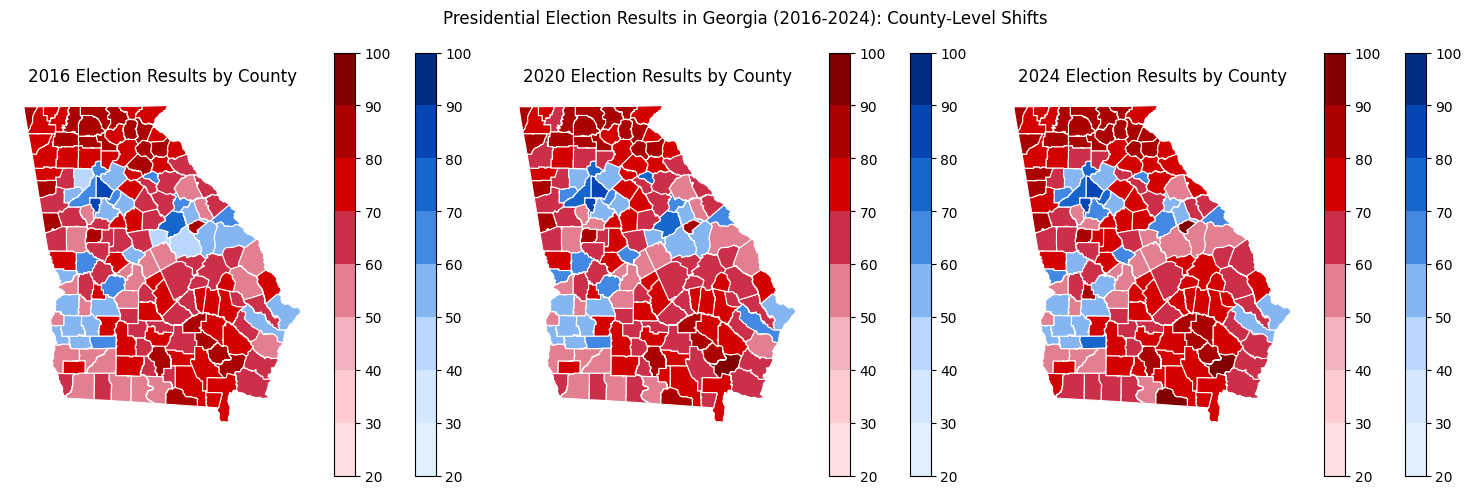

In [35]:
#visualizing overall election results by year
#see appendix for what the function making the graph is
fig, axes = plt.subplots(1, 3, figsize = (15, 5))

create_state_election_map(2016, ax = axes[0])
create_state_election_map(2020, ax = axes[1])
create_state_election_map(2024, ax = axes[2])

plt.suptitle("Presidential Election Results in Georgia (2016-2024): County-Level Shifts")
plt.tight_layout()
plt.show()

All three figures reveal the general distribution of Democratic and Republican support, but looking at each map individually reveal some nuances.
For instance, one can draw the conclusion of Democratic support being mostly clustered around a single county in Northern Georgia—that is Fulton County, home to Atlanta. In addition, one can note that across all three maps there appears to be a "band" of support for the Democrats that stretches across middle Georgia.
What appears to change between the figures is the intensity in support for both parties. The counties that are won by each party remains relatively stable but it appears that counties in figure 1b (the middle graph) that went for the democratic candidate went so at a larger margin, while counties that went for the Republican candidate did so at lesser margins. These small differences add up, helping indicate how the democratic candidate was able to win. These graphs lead to several follow up question, such as what explains this "band" of Democratic support stretching throughout middle Georgia?

# Figure 2a-c: Demographics by County in Georgia

Recent research has found that race has a very close correlation to partisanship in the United States (Pew Research Center 2024).  As such, the following graphs visualize the demographics of the counties in Georgia, in the hopes that it might explain the voting patterns seen in the preceding plots, such as the existence of a "band" of Democratic support in rural Georgia.

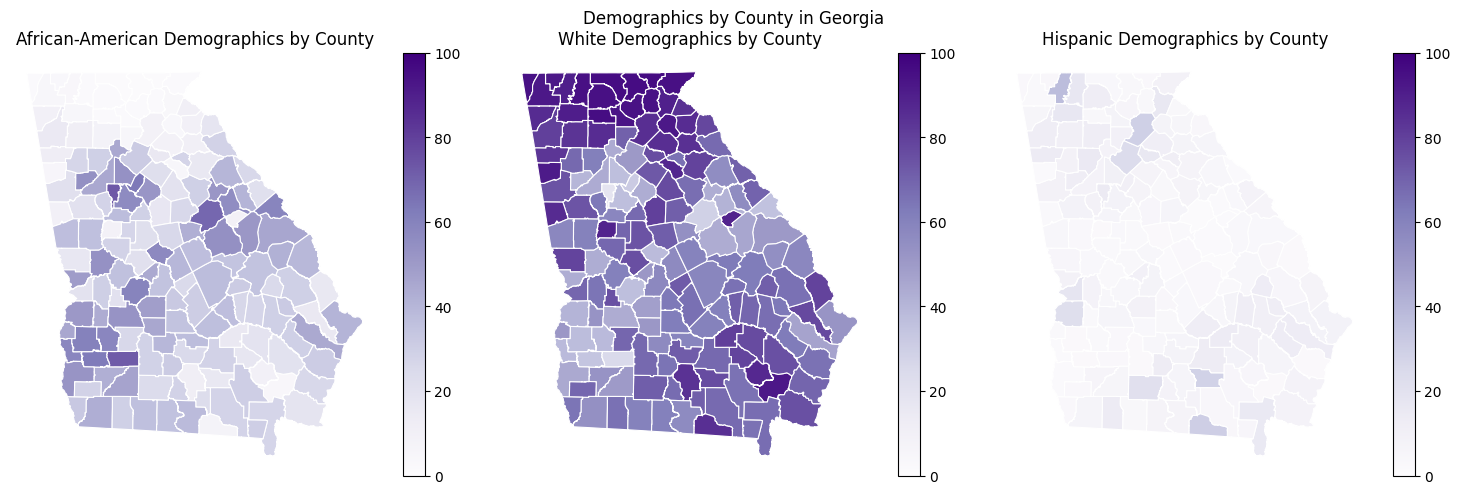

In [36]:
fig, axes = plt.subplots(1, 3, figsize = (15, 5))

combined_df.plot(
    column = combined_df.black_proportion * 100,
    cmap = "Purples",
    legend = True,
    vmin = 0,
    vmax = 100,
    edgecolors = "white",
    linewidth = 0.8,
    ax = axes[0]
)
axes[0].set_title("African-American Demographics by County")
axes[0].axis("off")

combined_df.plot(
    column = combined_df.white_proportion * 100,
    cmap = "Purples",
    legend = True,
    vmin = 0,
    vmax = 100,
    edgecolors = "white",
    linewidth = 0.8,
    ax = axes[1]
)
axes[1].set_title("White Demographics by County")
axes[1].axis("off")

combined_df.plot(
    column = combined_df.hispanic_proportion * 100,
    cmap = "Purples",
    legend = True,
    vmin = 0,
    vmax = 100,
    edgecolors = "white",
    linewidth = 0.8,
    ax = axes[2]
)
axes[2].set_title("Hispanic Demographics by County")
axes[2].axis("off")

fig.suptitle("Demographics by County in Georgia")
fig.tight_layout()
fig.show()

The Pew Research Center's claim that "Black voters continue to overwhelmingly associate with the Democratic Party" appears to apply to Georgia (Pew Research Center 2024, 14). The "band" identified in Figure 1a-c appears to exist because there is a higher proportion of African-Americans, a demographic that favors Democrats nationally by a 71 percentage point margin (Pew Research Center 2024, 13). This explanation also appears to help explain why there exists a "blue dot" in Northern Atlanta, where there again appears to be a higher percentage of African-Americans. But, that phenonmena could also be explained by a growing partisan rural-urban divide, with Atlanta being a major city (Pew Research Center 2018, 29).

Plotting the 2020 election results against the distribution of African-Americans by county further reveals this as seen in the below figure.

#Figure 3: 2020 Election Results and African-American Demographics by County

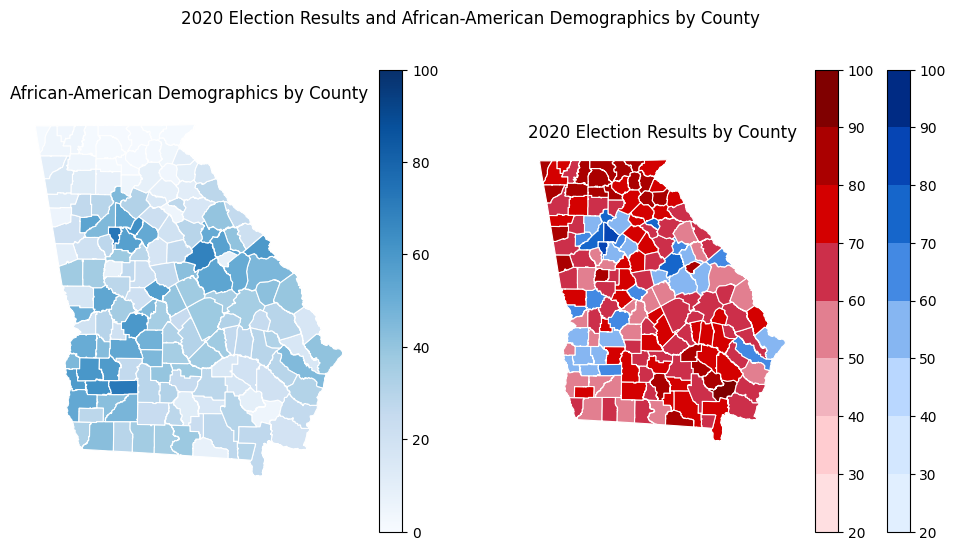

In [37]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6))

combined_df.plot(
    column = combined_df.black_proportion * 100,
    legend = True,
    cmap = "Blues",
    vmin = 0,
    vmax = 100,
    edgecolors = "white",
    linewidth = 0.8,
    ax = axes[0]
)
axes[0].set_title("African-American Demographics by County")
axes[0].axis("off")

create_state_election_map(2020, ax = axes[1])

plt.suptitle("2020 Election Results and African-American Demographics by County")

plt.show()

With demographic factors not truly explaining the prevalence of democratic support, could economic factors, as plotted in the following graphs potentially shed light on what is happening in this realignment?

#Figure 4a-c: Economics by County in Georgia

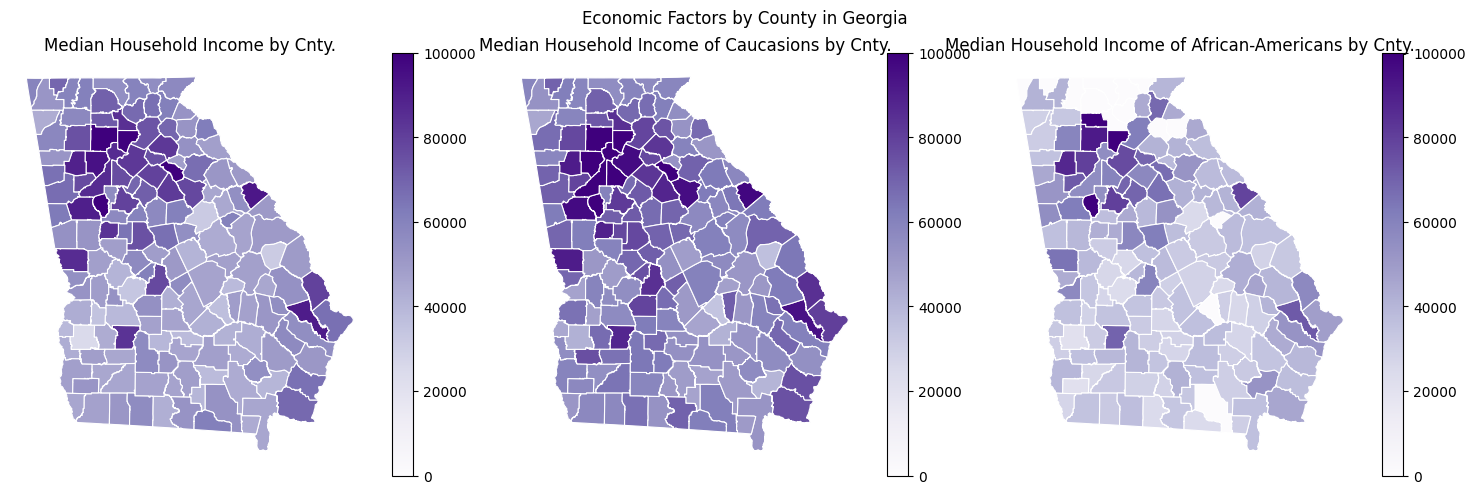

In [38]:
fig, axes = plt.subplots(1, 3, figsize = (15, 5))

combined_df.plot(
    column = combined_df.median_income,
    cmap = "Purples",
    legend = True,
    vmin = 0,
    #standardizing scale used
    vmax = 100000,
    edgecolors = "white",
    linewidth = 0.8,
    ax = axes[0]
)
axes[0].set_title("Median Household Income by Cnty.")
axes[0].axis("off")

combined_df.plot(
    column = combined_df.median_income_white,
    cmap = "Purples",
    legend = True,
    vmin = 0,
    #standardizing scale used
    vmax = 100000,
    edgecolors = "white",
    linewidth = 0.8,
    ax = axes[1]
)
axes[1].set_title("Median Household Income of Caucasions by Cnty.")
axes[1].axis("off")

combined_df.plot(
    column = combined_df.median_income_black,
    cmap = "Purples",
    legend = True,
    vmin = 0,
    #standardizing scale used
    vmax = 100000,
    edgecolors = "white",
    linewidth = 0.8,
    ax = axes[2]
)
axes[2].set_title("Median Household Income of African-Americans by Cnty.")
axes[2].axis("off")

fig.suptitle("Economic Factors by County in Georgia")
fig.tight_layout()
fig.show()

The economic data also appears to help explain why the Atlanta region is so democratic. Where the "band" could be explained almost entirely be demographic, the case of Atlanta appears to more explainable by the rural-urban divide and economic divide. The counties that compose this belt have some of the highest median household incomes out of all the counties in Georgia. This trend also appears to persist when the data is broken down by ethnic group. And since higher income demographics are more likely to vote Democratic, that combined with the demographics and urban-rural divide help explain the presence of the blue dot in the middle of a sea of red (Pew Research Center 2018).

#Figure 5: Change in Politics

While the previous graphs were revealing, the data they captured was static. Georgia has undergone a major transformation, from electing a man who likely organized a lynching in order to bolster his re-election chances to voting for Joe Biden over Donald Trump (Bluestein 2007). Because this dataset I am using contains multiple elections, I can also visualize the changes in Georgia over time, rather than a static piece of data.

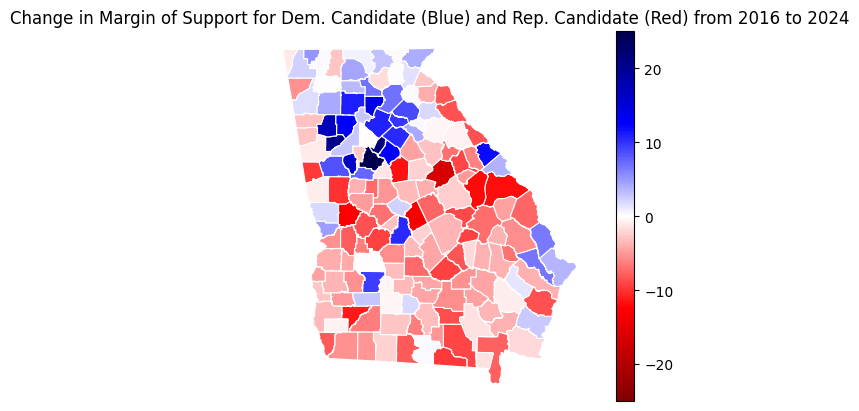

In [39]:
combined_df.plot(
    column = combined_df.swing_in_margin * 100,
    #using rev. seismic map to mirror colors used for both political parties
    cmap = "seismic_r",
    legend = True,
    #capping scale for legibility purposes
    vmin = -25,
    vmax = 25,
    edgecolors = "white",
    linewidth = 0.8
)
plt.title("Change in Margin of Support for Dem. Candidate (Blue) and Rep. Candidate (Red) from 2016 to 2024")
plt.axis("off")
plt.show()

The graph reveals the increasingly democratic tilt of suburbs (which I am defining as the core counties surrounding Fulton County, which contains the majority of Atlanta). The Pew Research Center found that suburbs have become reamined incredibly competitive even as urban areas remained strongly Democratic and rural areas strongly Republican (Pew Research Center 2024, 45). This graph also shows more rural areas becoming increasingly Republican, including those that were part of the "band" that still went to the Democrats, just by less margins, which tracks with the increasing political divide in rural counties (Pew Research Center 2024, 45).

#Visualization 6: Change in Average Margin of Victory over Time

<Figure size 1000x500 with 0 Axes>

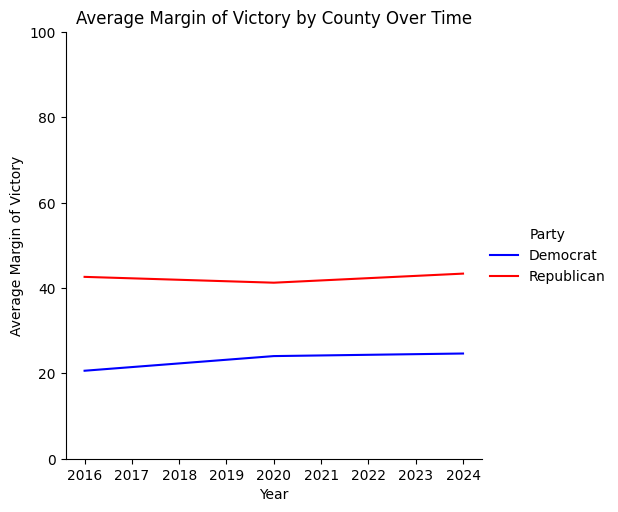

In [40]:
#getting years to visuaize
years = np.arange(2016, 2025, 4).astype(int)

avg_margin_dem = np.array([combined_df[f"margin_of_vic_{year}"][combined_df[f"margin_of_vic_{year}"] > 0].mean() for year in years])
#taking abs val. because a Rep. win is represented with a neg. value
avg_margin_gop = np.array([abs(combined_df[f"margin_of_vic_{year}"][combined_df[f"margin_of_vic_{year}"] < 0].mean()) for year in years])


#creating a df for plotting
plot_df = pd.DataFrame({
    #using np.tile() to not do element wise ops
    #credit to :https://numpy.org/doc/stable/reference/generated/numpy.tile.html
    'Year': np.tile(years, 2),  # Duplicate years for both parties
    #allows for the creation of two lines (one for dems, and for reps)
    'Margin': np.concatenate([avg_margin_dem, avg_margin_gop]) * 100,
    'Party': ['Democrat'] * len(years) + ['Republican'] * len(years)  # Add party labels
})
plt.figure(figsize=(10, 5))
sns.relplot(data = plot_df, x = "Year", y = "Margin", hue = "Party", kind = "line", palette = {"Democrat" : "blue", "Republican" : "red"})
plt.xlabel("Year")
plt.ylabel("Average Margin of Victory")
plt.ylim(0, 100)
plt.title("Average Margin of Victory by County Over Time")
plt.show()

The  graph illustrates the average margin of victory by county for the Democratic and Republican parties in Georgia presidential elections from 2016 to 2024. It shows that while Republicans consistently maintained a higher average margin of victory in the counties they won, the Democrats experienced a notable increase in their average margin from 2016 to 2020, further followed by a slight increase in 2024. This suggests that while Democratic support might be concentrated in fewer counties, those counties became less competitive competitive between 2016 and 2020, before slightly solidifying their Democratic lean in 2024. The graph shows that Republicans generally enjoy larger margins of victory in their strongholds, while Democrats experienced fluctuating, but generally smaller, average margins in their areas of support.

#Visualization 7: Proportion of counties won by each party

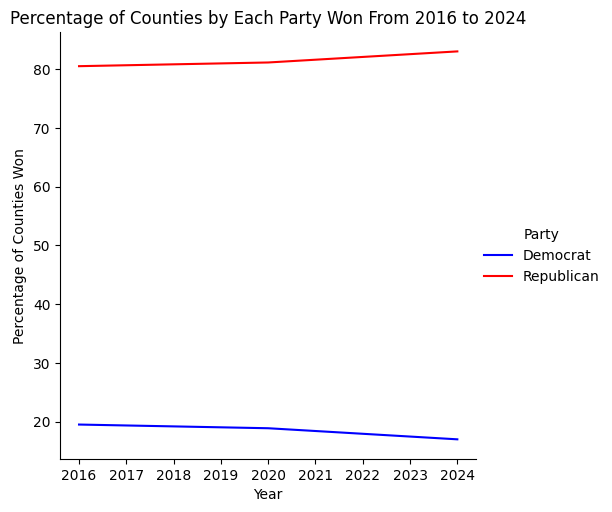

In [41]:
#calculate percentage of counties won by each party
percent_counties_dem = [(combined_df[f"margin_of_vic_{year}"] > 0).sum() / len(combined_df) * 100 for year in years]
percent_counties_gop = [(combined_df[f"margin_of_vic_{year}"] < 0).sum() / len(combined_df) * 100 for year in years]

plot_df = pd.DataFrame({
    'Year': np.tile(years, 2),  # Duplicate years for both parties
    'Percentage': np.concatenate([percent_counties_dem, percent_counties_gop]),
    'Party': ['Democrat'] * len(years) + ['Republican'] * len(years)  # Add party labels
})
sns.relplot(data = plot_df, x = "Year", y = "Percentage", hue = "Party", kind = "line", palette = {"Democrat" : "blue", "Republican" : "red"})
plt.xlabel("Year")
plt.ylabel("Percentage of Counties Won")
plt.title("Percentage of Counties by Each Party Won From 2016 to 2024")
plt.show()

This graph shows that Democratic support appears to be clustered, with them winning only approximately 20% of the total counties in Georgia. In 2020, the year in which they won Georgia's 16 electoral colleg votes, they won only about a fifth of the total number of counties in Georgia, despite winning a plurality of the total votes cast, indicating the degree to which its support is clustered around urban areas.

## Looking for Correlations

While the visualizations above provide valuable insights into the political and demographic landscape of Georgia, further analysis is needed to explore potential correlations between these factors. This section examines the relationships between demographic and economic variables, such as race and income, and their association with election outcomes, to shed light on the underlying drivers of Georgia's political realignment.

#Visualization 8: Correlation based on Demographic Factors

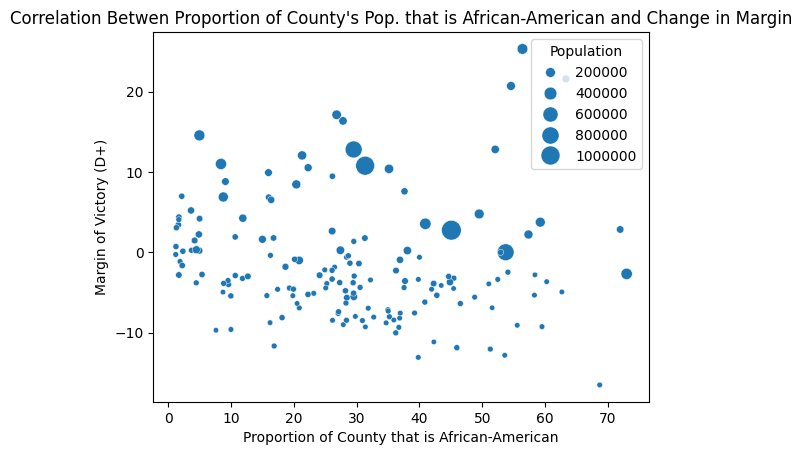

Correlation Factor: -0.12329365243687906


In [42]:
#seeing if there is a correlation from demographic factors
sns.scatterplot(
    data = combined_df,
    x = combined_df.black_proportion * 100,
    y = combined_df.swing_in_margin * 100,

    size = "total_population", sizes = (15, 200)
)
plt.title("Correlation Betwen Proportion of County's Pop. that is African-American and Change in Margin")
plt.xlabel("Proportion of County that is African-American")
plt.ylabel("Margin of Victory (D+)")

#renaming inset legend
ax = plt.gca()
ax.get_legend().set_title("Population")

plt.show()

print("Correlation Factor:", statistics.correlation(combined_df.black_proportion * 100, combined_df.swing_in_margin * 100))



The scatter plot visualizes the relationship between the proportion of a county's population that is African-American and the change in the Democratic margin of victory in Georgia counties from 2016 to 2024. The plot indicates a weak negative correlation (-0.12), suggesting a very slight tendency for counties with a higher percentage of African-American residents to experience a smaller swing towards the Democratic candidate over this period. This weak correlation contradicts the expectation that a larger African-American population would lead to a greater increase in Democratic votes. While it appears that there is a slight decrease, it is important to note that there is still an extremely strong correlation between a county having a high-proportion of African-Americans and the support for the Democratic Party as shown in the following visual.

#Visualization 9: Correlation between Racial Proportions and Margin of Victory

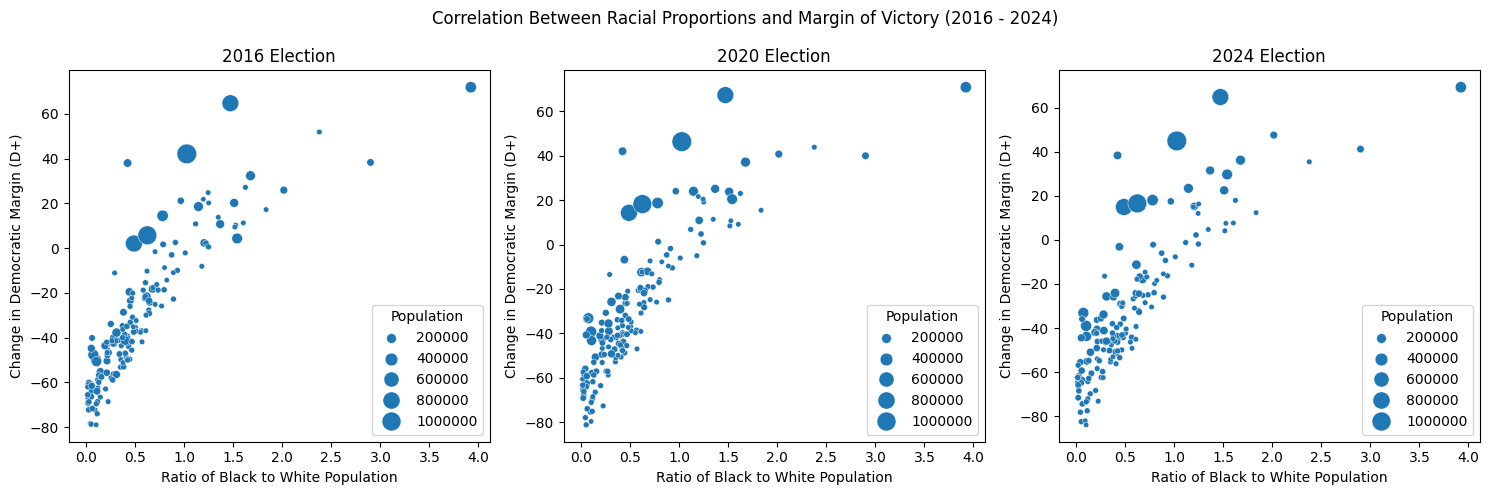

In [43]:
fig, axes = plt.subplots(1, 3, figsize = (15, 5))
plotting_df = combined_df[["margin_of_vic_2016", "margin_of_vic_2020", "margin_of_vic_2024", "County", "black_proportion", "white_proportion", "total_population"]]

#renaming total_population for plotting sakes
plotting_df = plotting_df.rename(columns = {"total_population" : "Population"})

sns.scatterplot(
    data = plotting_df,
    x = (plotting_df.black_proportion / plotting_df.white_proportion),
    y = plotting_df.margin_of_vic_2016 * 100,
    size = "Population",
    sizes = (15, 200),
    ax = axes[0]
)

axes[0].set_xlabel("Ratio of Black to White Population")
axes[0].set_ylabel("Change in Democratic Margin (D+)")
axes[0].set_title("2016 Election")

sns.scatterplot(
    data = plotting_df,
    x = (plotting_df.black_proportion / plotting_df.white_proportion),
    y = plotting_df.margin_of_vic_2020 * 100,
    size = "Population",
    sizes = (15, 200),
    ax = axes[1]
)

axes[1].set_xlabel("Ratio of Black to White Population")
axes[1].set_ylabel("Change in Democratic Margin (D+)")
axes[1].set_title("2020 Election")

sns.scatterplot(
    data = plotting_df,
    x = (plotting_df.black_proportion / plotting_df.white_proportion),
    y = plotting_df.margin_of_vic_2024 * 100,
    size = "Population",
    sizes = (15, 200),
    ax = axes[2]
)

axes[2].set_xlabel("Ratio of Black to White Population")
axes[2].set_ylabel("Change in Democratic Margin (D+)")
axes[2].set_title("2024 Election")

plt.suptitle("Correlation Between Racial Proportions and Margin of Victory (2016 - 2024)")
plt.tight_layout()
plt.show()

The scatter plots reveal a consistent positive correlation between the Black-to-White population ratio in Georgia counties and the Democratic margin of victory in presidential elections from 2016 to 2024. This indicates a strong association between racial demographics and voting behavior, where counties with higher proportions of Black residents relative to White residents tend to favor Democratic candidates. While the strength of this relationship appears most pronounced in 2020, it remains visible across all three election years, suggesting a relatively stable trend. The variations in point size, reflecting population, further highlight that larger, more diverse counties exhibit a wider range of outcomes compared to smaller, more homogeneous ones. Overall, the graphs strongly suggest that racial demographics play a significant role in shaping Georgia's political landscape and influencing election outcomes.

#Visualization 10: Correlation between African-American Proportion by County and the Margin of Victory in the 2016 - 2024 Presidential Elections

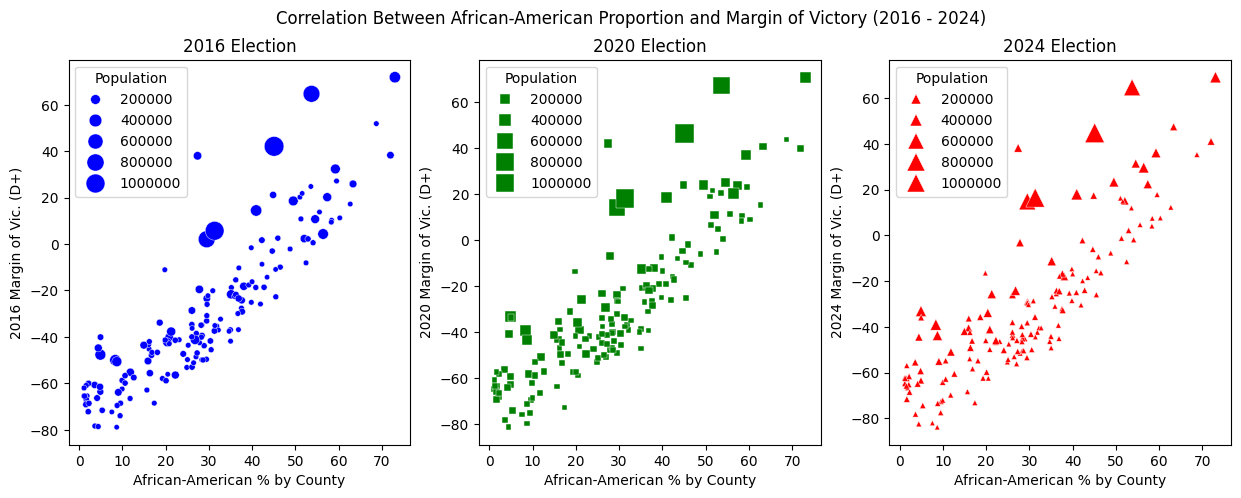

In [44]:
fig, axes = plt.subplots(1, 3, figsize = (15, 5))

#getting a plot df
plot_df = combined_df[
    ["black_proportion",
     "margin_of_vic_2016",
     "margin_of_vic_2020",
     "margin_of_vic_2024",
     "total_population"]
].copy()

#renaming columns for graphing
plot_df = plot_df.rename(columns = {
    "margin_of_vic_2016" : "2016 Margin of Vic. (D+)",
    "margin_of_vic_2020" : "2020 Margin of Vic. (D+)",
    "margin_of_vic_2024" : "2024 Margin of Vic. (D+)",
    "black_proportion" : "African-American % by County",
    "total_population" : "Population"
})

sns.scatterplot(
    data = plot_df,
    x = plot_df["African-American % by County"] * 100,
    y = plot_df["2016 Margin of Vic. (D+)"] * 100,
    color = "blue",
    marker = "o",
    size = plot_df["Population"],
    sizes = (15, 200),
    ax = axes[0]
)
axes[0].set_title("2016 Election")

sns.scatterplot(
    data = plot_df,
    x = plot_df["African-American % by County"] * 100,
    y = plot_df["2020 Margin of Vic. (D+)"] * 100,
    color = "green",
    marker = "s",
    size = plot_df["Population"],
    sizes = (15, 200),
    ax = axes[1]
)
axes[1].set_title("2020 Election")

sns.scatterplot(
    data = plot_df,
    x = plot_df["African-American % by County"] * 100,
    y = plot_df["2024 Margin of Vic. (D+)"] * 100,
    color = "red",
    marker = "^",
    size = plot_df["Population"],
    sizes = (15, 200),
    ax = axes[2]
)
axes[2].set_title("2024 Election")

plt.suptitle("Correlation Between African-American Proportion and Margin of Victory (2016 - 2024)")
plt.show()

The scatter plots demonstrate a strong positive correlation between the proportion of African-American residents in a county and the Democratic margin of victory in Georgia for the 2016, 2020, and 2024 presidential elections. Across all three election years, counties with a higher percentage of African-American residents tend to have a larger Democratic margin of victory, indicated by the upward trend of the data points. This suggests that areas with a larger African-American population are more likely to vote for the Democratic candidate. This pattern is consistent across the three elections, reinforcing the strong link between African-American demographics and Democratic voting patterns in Georgia. Although there might be slight variations in the strength of the correlation from year to year, as the preceding visual illustrates, these visualizations illustrate the strong association between the proportion of a county that is African-American and the share of vote that the Democratic candidate receives.

#Visualization 11: Correlation Between Racial Demographics and Margin of Victory by County

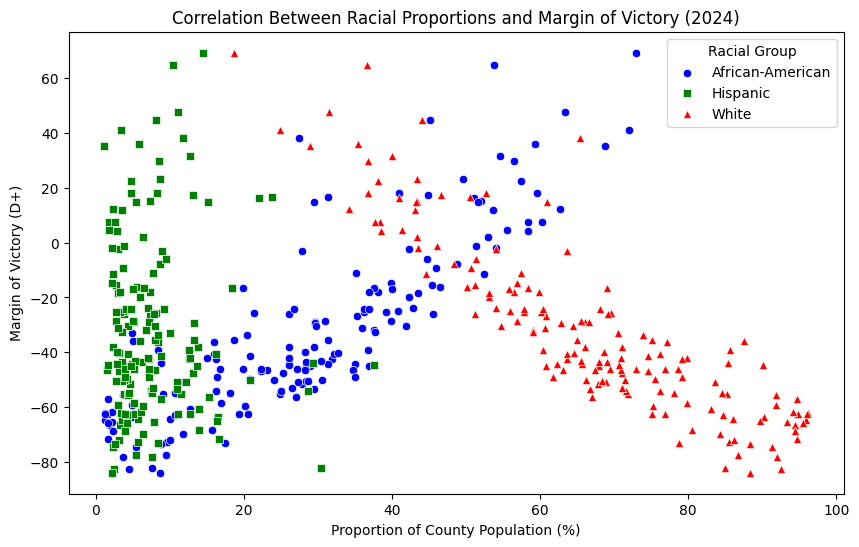

In [45]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(
    data=combined_df,
    x=combined_df.black_proportion * 100,
    y=combined_df.margin_of_vic_2024 * 100,
    color="blue",
    marker="o",
    ax=ax,
    label = "African-American"
)

sns.scatterplot(
    data=combined_df,
    x=combined_df.hispanic_proportion * 100,
    y=combined_df.margin_of_vic_2024 * 100,
    color="green",
    marker="s",
    ax=ax,
    label = "Hispanic"
)

sns.scatterplot(
    data=combined_df,
    x=combined_df.white_proportion * 100,
    y=combined_df.margin_of_vic_2024 * 100,
    color="red",
    marker="^",
    ax=ax,
    label = "White"
)

plt.title("Correlation Between Racial Proportions and Margin of Victory (2024)")
plt.xlabel("Proportion of County Population (%)")
plt.ylabel("Margin of Victory (D+)")

# Renaming inset legend
ax = plt.gca()
ax.get_legend().set_title("Racial Group")

plt.show()

The graph indicates a strong positive correlation between the proportion of African-American residents in a county and the Democratic margin of victory, which mirrors the results found in the previous visual. Conversely, there's a negative correlation between the proportion of White residents and the Democratic margin, implying that counties with a higher percentage of White residents lean towards the Republican candidate. The Hispanic data points are more clustered and show a weaker correlation with the margin of victory, suggesting a less pronounced relationship between Hispanic demographics and voting preference compared to the other two racial groups. Overall, the plot highlights the significant influence of racial demographics on voting patterns in Georgia, with African-American and White populations exhibiting particularly strong and contrasting relationships with the Democratic margin of victory in the 2024 election.

Because the Hispanic clusters appear to be so clustered, the next visual will focus on if there is any correlation in the hopes that graphing them by themselves will be more clear.

# Visualization 12: Correlation Between Hispanic Proportions and Margin of Victory

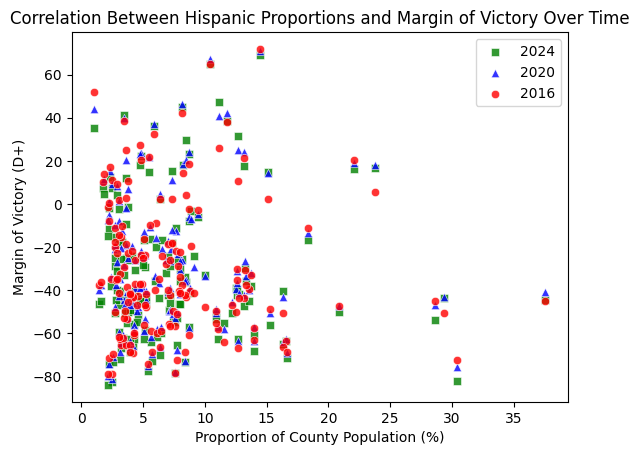

In [46]:
#graphing Hispanic Proportions on a seperate graph because how clustered they are
sns.scatterplot(
    data=combined_df,
    x=combined_df.hispanic_proportion * 100,
    y=combined_df.margin_of_vic_2024 * 100,
    color="green",
    marker = "s",
    alpha = 0.8,
    label = "2024"
)
sns.scatterplot(
    data=combined_df,
    x=combined_df.hispanic_proportion * 100,
    y=combined_df.margin_of_vic_2020 * 100,
    color="blue",
    marker = "^",
    alpha = 0.8,
    label = "2020"
)
sns.scatterplot(
    data=combined_df,
    x=combined_df.hispanic_proportion * 100,
    y=combined_df.margin_of_vic_2016 * 100,
    color="red",
    marker = "o",
    alpha = 0.8,
    label = "2016"
)
plt.title("Correlation Between Hispanic Proportions and Margin of Victory Over Time")
plt.xlabel("Proportion of County Population (%)")
plt.ylabel("Margin of Victory (D+)")
plt.show()

While there might be a slight tendency for counties with higher Hispanic populations to favor Democratic candidates in some years, the overall relationship appears less pronounced and more variable compared to the trends observed for African-American and White voters. The clustering of data points suggests a relatively limited range of Hispanic population percentages across Georgia counties, which might contribute to the less definitive correlation observed in the plot. Notably, the results differ across the three elections, indicating a potential shift in voting behavior within the Hispanic community over time.

#Visualization 13: Correlation Between non-Hispanic Racial Proportions and Margin of Victory in Georgia Counties in 2024

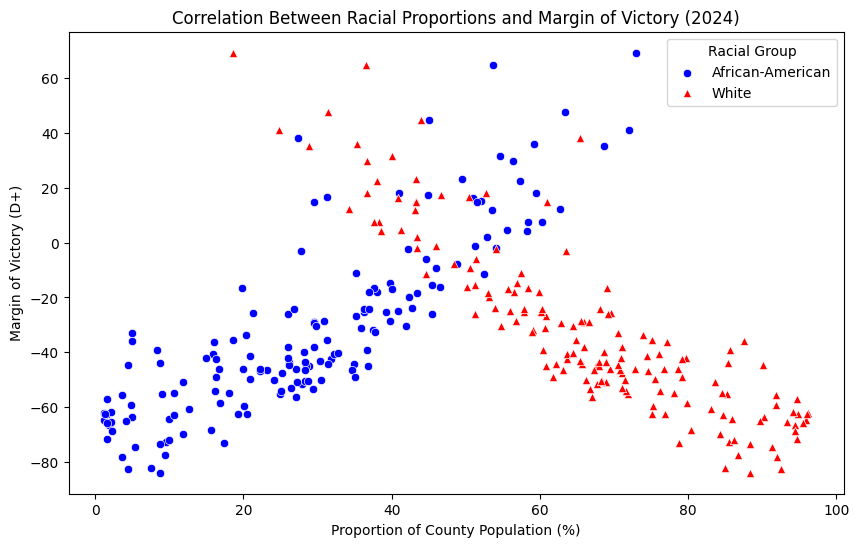

In [47]:
#graphing other two without Hispanic proportions
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(
    data=combined_df,
    x=combined_df.black_proportion * 100,
    y=combined_df.margin_of_vic_2024 * 100,
    color="blue",
    marker="o",
    ax=ax,
    label = "African-American"
)

sns.scatterplot(
    data=combined_df,
    x=combined_df.white_proportion * 100,
    y=combined_df.margin_of_vic_2024 * 100,
    color="red",
    marker="^",
    ax=ax,
    label = "White"
)

plt.title("Correlation Between Racial Proportions and Margin of Victory (2024)")
plt.xlabel("Proportion of County Population (%)")
plt.ylabel("Margin of Victory (D+)")

# Renaming inset legend
ax = plt.gca()
ax.get_legend().set_title("Racial Group")

plt.show()

#Visualization 14: Distribution of Median Income by Winning Party

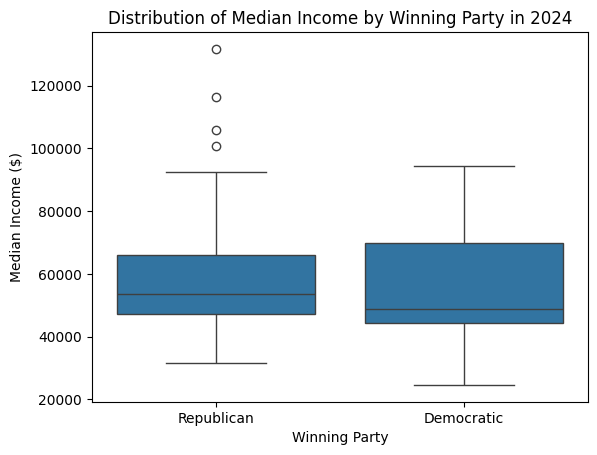

In [48]:
#looking at economic data
#copying over relevant data to graph
graphing_df = combined_df[["median_income", "margin_of_vic_2024"]].copy()

#adding winning party column for graphing
graphing_df["winning_party_2024"] = combined_df["margin_of_vic_2024"].apply(lambda x : "Democratic" if x > 0 else "Republican")

sns.boxplot(
    data = graphing_df,
    x = "winning_party_2024",
    y = "median_income"
)

plt.title("Distribution of Median Income by Winning Party in 2024")
plt.xlabel("Winning Party")
plt.ylabel("Median Income ($)")
plt.show()

The box plot reveals a noticeable difference in median household income between counties won by the Democratic and Republican parties in the 2024 Georgia election. Counties won by the Democratic party tend to have a higher median income compared to those won by the Republican party. The median income for Democratic-leaning counties is positioned higher on the y-axis, indicating a greater concentration of higher-income households in those areas. The interquartile range (IQR) for Democratic counties is also wider, suggesting a larger spread of income levels within that group. Notably, there are some outlier counties won by the Democrats with exceptionally high median incomes, which is likely the metro Atlanta counties. In contrast, Republican-leaning counties generally have a lower median income and a narrower IQR, indicating a more concentrated income distribution within that group. These results suggest a potential association between income levels and voting preferences in Georgia, with higher-income areas leaning towards the Democratic candidate and lower-income areas leaning towards the Republican candidate in the 2024 election, consistent with what Figures 3a-c show in the clustering of incomes geographically.

#Visualization 15: Distribution of Income Seperated based on Race and the Election Year

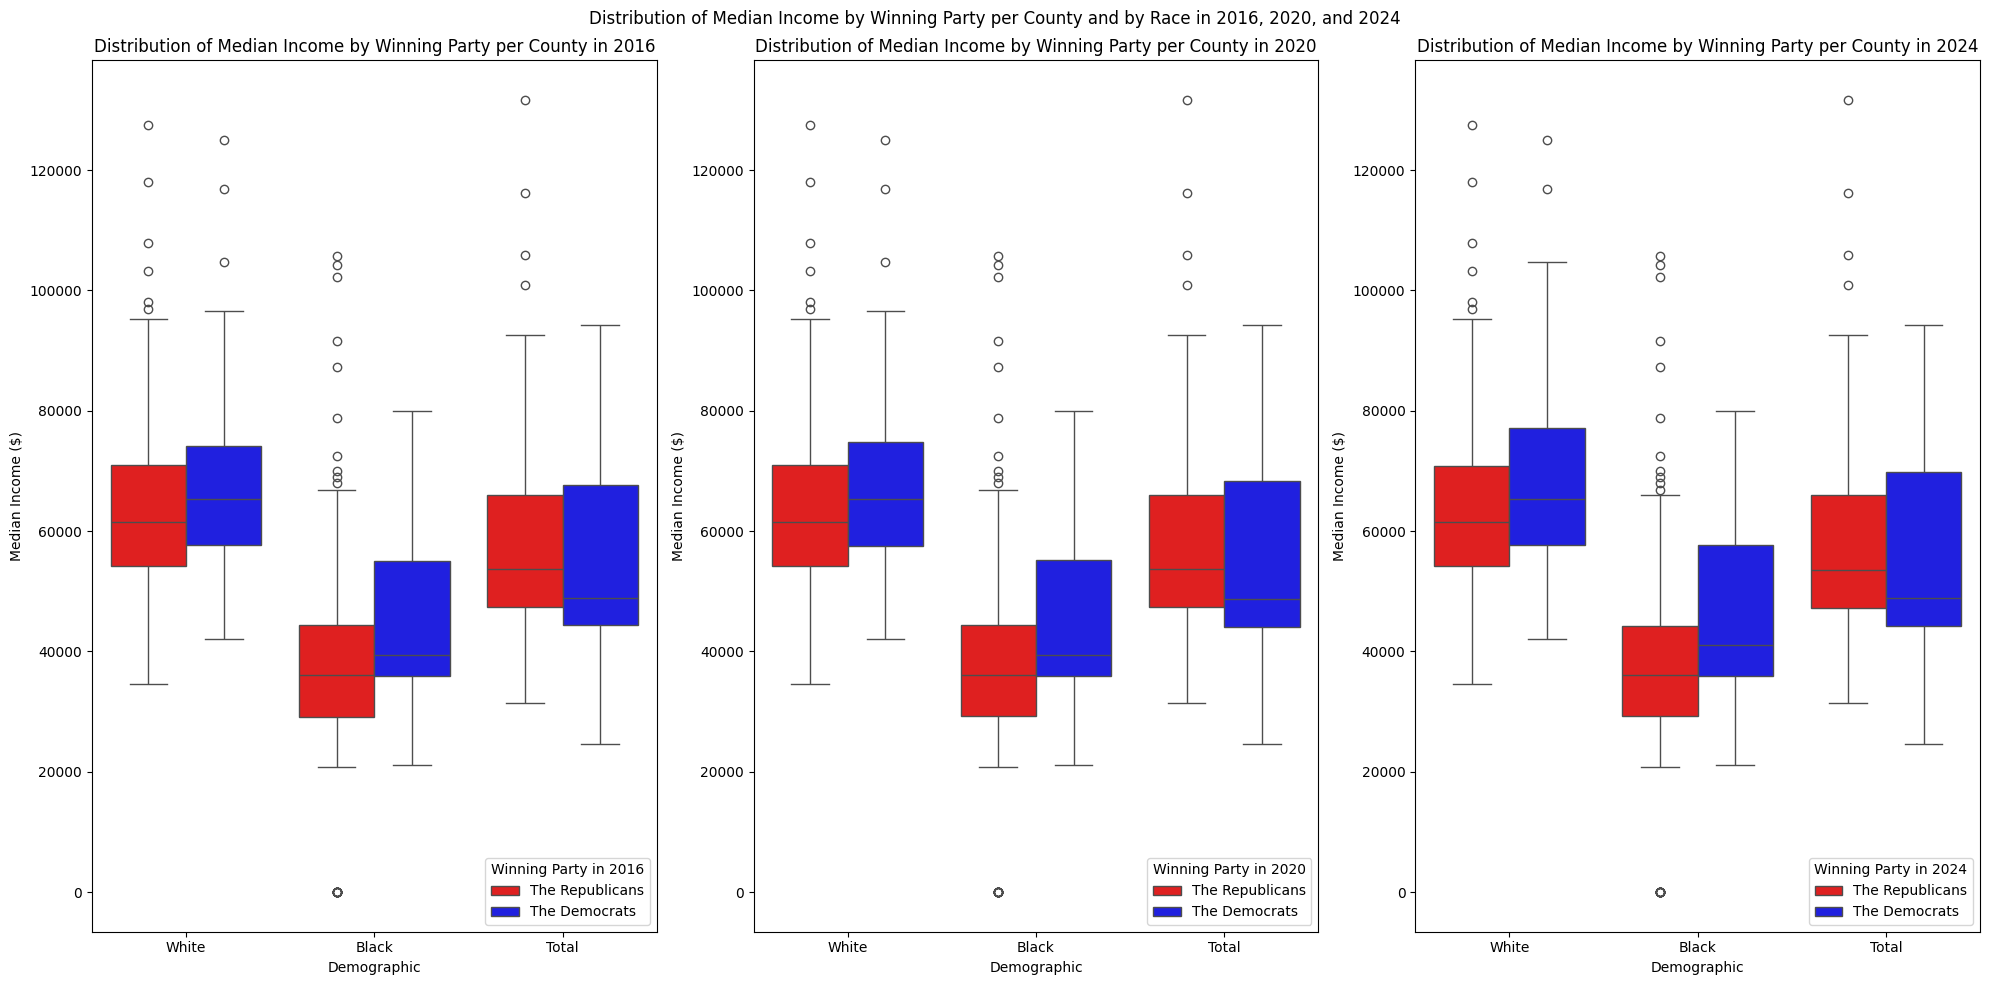

In [49]:
# Select relevant columns
relevant_cols = ['median_income_white', 'median_income_black', 'median_income',
                 'margin_of_vic_2016', 'margin_of_vic_2020', 'margin_of_vic_2024']
plotting_df = combined_df[relevant_cols].copy()

# Melt the DataFrame to reshape the data
plotting_df = pd.melt(plotting_df,
                     id_vars=['margin_of_vic_2016', 'margin_of_vic_2020', 'margin_of_vic_2024'],
                     value_vars=['median_income_white', 'median_income_black', 'median_income'],
                     var_name='Demographic',
                     value_name='Median Income')

# Create winning party columns for each year
for year in [2016, 2020, 2024]:
    plotting_df[f'winning_party_{year}'] = plotting_df[f'margin_of_vic_{year}'].apply(
        lambda x: "The Democrats" if x > 0 else "The Republicans"
    )


#renaming rows and columns for plotting
plotting_df = plotting_df.rename(columns = {
    "margin_of_vic_2016" : "Margin of Victory in 2016",
    "margin_of_vic_2020" : "Margin of Victory in 2020",
    "margin_of_vic_2024" : "Margin of Victory in 2024",
    "winning_party_2016" : "Winning Party in 2016",
    "winning_party_2020" : "Winning Party in 2020",
    "winning_party_2024" : "Winning Party in 2024"
})

fig, axes = plt.subplots(1, 3, figsize = (20, 10))

for i, year in enumerate([2016, 2020, 2024]):

  ax = axes[i]

  sns.boxplot(
      data = plotting_df,
      x = "Demographic",
      y = "Median Income",
      hue = f"Winning Party in {year}",
      palette = {"The Democrats" : "blue", "The Republicans" : "red"},
      ax = ax
  )
  ax.set_xticks([0, 1, 2])
  ax.set_xticklabels(["White", "Black", "Total"])
  ax.set_title(f"Distribution of Median Income by Winning Party per County in {year}")
  ax.set_xlabel("Demographic")
  ax.set_ylabel("Median Income ($)")

fig.suptitle("Distribution of Median Income by Winning Party per County and by Race in 2016, 2020, and 2024")
fig.tight_layout()
fig.show()

The graph shows across all three election years, that there's a consistent trend: counties won by the Democrats tend to have higher median incomes, particularly when considering the overall population and White residents. This difference is most pronounced in 2020 and 2024. The plots also reveal that in counties where Democrats won, Black residents generally have lower median incomes compared to White residents, while this income gap appears narrower or even reversed in counties won by Republicans. Notably, there are outlier counties with exceptionally high median incomes, especially among those won by Democrats. These results reinforce the potential association between income and voting patterns, with higher-income areas and White demographics leaning towards the Democrats, while lower-income areas tend to favor Republicans. While Black residents generally have lower median incomes, their voting preferences still align strongly with the Democrats, regardless of the winning party in their county.

#Visualization 16: Distribution of Income Across Counties and Election Years

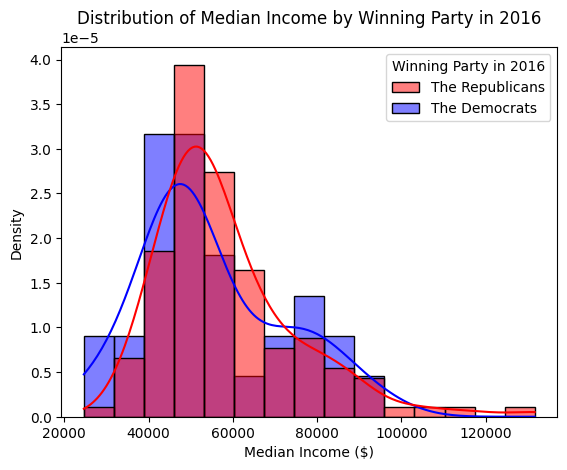

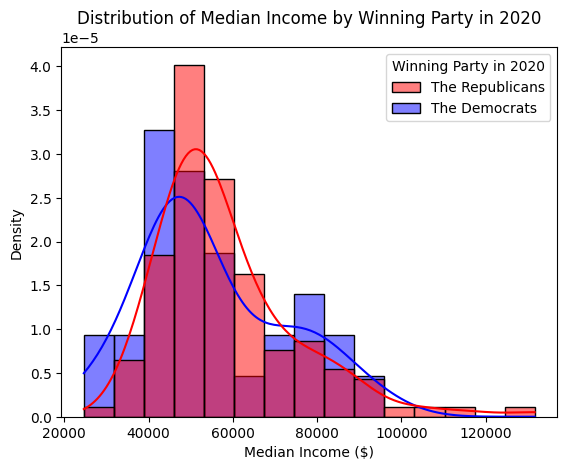

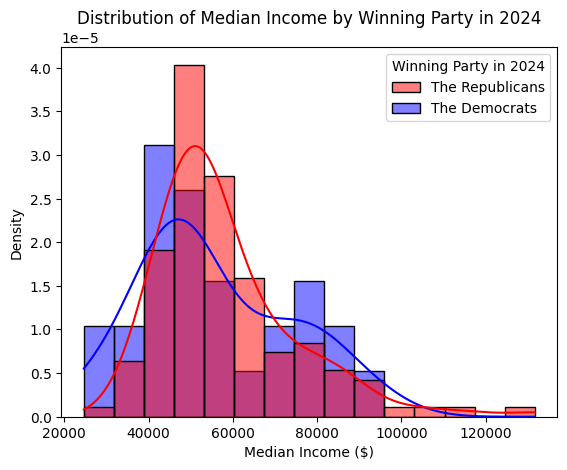

In [50]:
graphing_df = combined_df[["median_income", "margin_of_vic_2024"]].copy()


for year in [2016, 2020, 2024]:
  #adding winning party column for graphing
  graphing_df[f"Winning Party in {year}"] = combined_df[f"margin_of_vic_{year}"].apply(lambda x : "The Democrats" if x > 0 else "The Republicans")
  sns.histplot(
      data = graphing_df,
      x = "median_income",
      hue = f"Winning Party in {year}",
      palette = {"The Democrats" : "blue", "The Republicans" : "red"},
      common_norm = False,
      stat = "density",
      kde = True,
      alpha = 0.5
  )
  plt.title(f"Distribution of Median Income by Winning Party in {year}")
  plt.xlabel("Median Income ($)")
  plt.ylabel("Density")
  plt.show()

he histograms reveal that in each election year, there's a clear difference in income distribution between the two parties' winning counties. Democratic-leaning counties tend to have a higher median income, as indicated by the blue distribution being shifted to the right. Republican-leaning counties generally have a lower median income, with the red distribution concentrated towards the lower end of the income spectrum. The overlap between the distributions suggests some variation within each group, but the overall pattern highlights a consistent relationship between income levels and voting preferences in Georgia. This trend persists across the three elections.

## Conclusions

This project sought to understand the factors contributing to Georgia's political shift, particularly its transformation into a swing state. The analysis of county-level election results, demographics, and economic indicators revealed several key insights that help answer the question: what are the trends, patterns, and factors explaining Georgia's political realignment?

#Political Shifts

Visualizations 1a-c demonstrated that Georgia's electorate is becoming more polarized, with rural areas increasingly favoring Republican candidates and urban/suburban areas leaning towards Democratic candidates. Figure 4 reinforces this trend, highlighting the Democratic tilt in suburbs surrounding Atlanta and increased Republican support in rural communities. This aligns with national trends of a growing urban-rural political divide, with Georgia emerging as a microcosm of this phenomenon.

#Demographic and Economic Factors

The analysis confirms the close relationship between race and political affiliation. Figure 2a-c indicated a correlation between counties with higher African-American populations and those having a greater Democratic margin of victory, as seen in Figure 8. These findings align with the Pew Research Center's report that partisanship is strongly associated with race and ethnicity. Furthermore, economic factors play a significant role, with Visual 12 and 14 revealing higher median incomes in Democratic-leaning counties compared to those favoring Republicans. The project also revealed a complex interplay between income and race, showing that Black residents generally have lower median incomes than White residents in Democratic-leaning counties. This dynamic requires further investigation to fully understand its implications.

#The Democratic Surge: A Confluence of Factors

The Democratic surge in Georgia is primarily attributed to increased support in urban and suburban counties, with areas surrounding Atlanta experiencing a significant swing. This was further confirmed by Figure 6 which showed an increase in the total number of counties that Democrats managed to win over time. The shift is likely driven by changing demographics, including growing minority populations, an influx of younger and more diverse residents, and increased voter turnout. Economic factors also contribute, as higher-income areas and individuals lean towards the Democratic Party. While a weak negative correlation was found between swing to the Democratic Party and the proportion of African-Americans in a county, these areas still maintained their Democratic support over time, indicating a change in degree rather than in kind.

#Answering the question
Overall this project has shown that Georgia's transformation from a 'safe state' into a 'swing state' is attributable to multiple interlocking factors. A growing urban-rural divide, a strong correlation between race and partisanship, and a correlation between economic status and voting preferences all can partially explain Georgia's transformation, but it appears that these factors and others have helped transform Georgia into its new status as a state worthy of being fought and campaigned over.

## Reflection
  
This project progressed smoothly in terms of data acquisition and initial visualization. Creating graphs and visualizations s to represent election outcomes and demographic distributions was relatively straightforward using libraries like geopandas and matplotlib. There was a bit of a learning curve in learning how to use geopandas, but after reading the docs, it got a lot easier.  Yet, challenges arose when delving into more complex analyses, such as establishing clear correlations between demographic/economic factors and political shifts. While visualizations hinted at these relationships, quantifying them and isolating specific influential factors proved more difficult. Additionally, attempts to incorporate interactive elements into the visualizations, such as allowing users to explore data by county or year, were explored but ultimately not included due to time constraints and technical complexities. Overall, approximately 20 hours were dedicated to this project, including data cleaning, visualization, analysis, and report writing.


##Bibliography

Bluestein, Greg. 2022. Flipped. London: Penguin Books.

———. 2007. “Ex-Governor Investigated in 1946 Lynchings.” NBC News. https://www.nbcnews.com/id/wbna19251476 (December 12, 2024).

Carl Vinson Institute of Government. 2024a. “Georgia Economic Data.” Georgia Data. University of Georgia. 2024. https://georgiadata.org/sites/default/files/economics_24.xlsx.

———. 2024b. “Georgia Population Data.” Georgia Data. University of Georgia. 2024. https://georgiadata.org/sites/default/files/population_24.xlsx.

Pew Research Center. 2018. “What Unites and Divides Urban, Suburban and Rural Communities.” https://www.pewresearch.org/wp-content/uploads/sites/20/2018/05/Pew-Research-Center-Community-Type-Full-Report-FINAL.pdf.

———. 2024. “Changing Partisan Divides in a Politically Divided Nation.” https://www.pewresearch.org/wp-content/uploads/sites/20/2024/04/PP_2024.4.9_partisan-coalitions_REPORT.pdf.

Tony, McGovern. 2024. “US County Level Election Results, 2008–2024.” GitHub. 2024. https://github.com/tonmcg/US_County_Level_Election_Results_08-24.U.S.

Census Bureau. 2020. “TIGER / Line Shapefiles by County in Georgia.” U.S. Census Bureau. 2020. https://www2.census.gov/geo/tiger/TIGER2020PL/STATE/13_GEORGIA/13/tl_2020_13_county20.zip.

## Appendix


In [51]:
#importing of necessary libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
#getting election data
#credit to Tony McGovern for the compilation of the data
!wget "https://github.com/tonmcg/US_County_Level_Election_Results_08-24/raw/faf9ef453d1f7775ec6e1caf6ecf56480e5c3f24/2016_US_County_Level_Presidential_Results.csv" -O pres_data_2016.csv
!wget "https://github.com/tonmcg/US_County_Level_Election_Results_08-24/raw/faf9ef453d1f7775ec6e1caf6ecf56480e5c3f24/2020_US_County_Level_Presidential_Results.csv" -O pres_data_2020.csv
!wget "https://github.com/tonmcg/US_County_Level_Election_Results_08-24/raw/faf9ef453d1f7775ec6e1caf6ecf56480e5c3f24/2024_US_County_Level_Presidential_Results.csv" -O pres_data_2024.csv

#getting demographic data
#credit to the University of Georgia's Carl Vinson Institute of Government
!wget "https://georgiadata.org/sites/default/files/population_24.xlsx" -O dem_data.xlsx

#getting economic data
#credit to the University of Georgia's Carl Vinson Institute of Government
!wget "https://georgiadata.org/sites/default/files/economics_24.xlsx" -O econ_data.xlsx

#getting shapefiles for graphing, credit to the U.S. Census Bureau
!wget "https://www2.census.gov/geo/tiger/TIGER2020PL/STATE/13_GEORGIA/13/tl_2020_13_county20.zip" -O geo_data.zip
!unzip geo_data.zip -d geo_data

--2025-03-28 18:16:44--  https://github.com/tonmcg/US_County_Level_Election_Results_08-24/raw/faf9ef453d1f7775ec6e1caf6ecf56480e5c3f24/2016_US_County_Level_Presidential_Results.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tonmcg/US_County_Level_Election_Results_08-24/faf9ef453d1f7775ec6e1caf6ecf56480e5c3f24/2016_US_County_Level_Presidential_Results.csv [following]
--2025-03-28 18:16:44--  https://raw.githubusercontent.com/tonmcg/US_County_Level_Election_Results_08-24/faf9ef453d1f7775ec6e1caf6ecf56480e5c3f24/2016_US_County_Level_Presidential_Results.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200

In [53]:
#loading data into dataframes
pres_df_2016 = pd.read_csv("pres_data_2016.csv")
pres_df_2020 = pd.read_csv("pres_data_2020.csv")
pres_df_2024 = pd.read_csv("pres_data_2024.csv")

#getting only counties in Georgia
ga_df_16 = pres_df_2016[pres_df_2016["state_abbr"] == "GA"]
ga_df_20 = pres_df_2020[pres_df_2020["state_name"] == "Georgia"]
ga_df_24 = pres_df_2024[pres_df_2024["state_name"] == "Georgia"]

#renaming items for clarity about which year they are from
#helper function for renaming
def rename_col(name, year):
  return name + "_" + str(year)

#removing unncessary columns
ga_df_16 = ga_df_16.reset_index().drop(columns = ["index", "Unnamed: 0", "state_abbr"])
ga_df_16 = ga_df_16.rename(columns = lambda x: rename_col(x, 2016))

#renaming two columns that don't need year
ga_df_16 = ga_df_16.rename(columns = {
    "county_name_2016" : "county_name",
    "combined_fips_2016" : "county_fips"
})

#repeating steps for the 2020 election dataframe
ga_df_20 = ga_df_20.reset_index().drop(columns = ["index", "state_name"])
ga_df_20 = ga_df_20.rename(columns = lambda x: rename_col(x, 2020))
ga_df_20 = ga_df_20.rename(columns = {
    "county_fips_2020" : "county_fips",
    "county_name_2020" : "county_name"
})

#repeating steps for the 2024 election dataframe
ga_df_24 = ga_df_24.reset_index().drop(columns = ["index", "state_name"])
ga_df_24 = ga_df_24.rename(columns = lambda x: rename_col(x, 2024))
ga_df_24 = ga_df_24.rename(columns = {
    "county_fips_2024" : "county_fips",
    "county_name_2024" : "county_name"
})

#combining election results into one dataframe
combined_df = pd.merge(ga_df_16, ga_df_20, on = "county_fips")
combined_df = pd.merge(combined_df, ga_df_24, on = "county_fips")

#dropping redundant columns
combined_df = combined_df.drop(columns = [
    "county_name_x",
    "county_name_y",
])

In [54]:
#dealing with demographic data
dem_data_df = pd.read_excel("dem_data.xlsx", sheet_name = 1)

#adding total pop
dem_data_df["total_population"] = dem_data_df["2023 Male Population"] + dem_data_df["2023 Female Population"]

#getting demographic specific populations
dem_data_df["black_population"] = dem_data_df["2023 Male Population, Black"] + dem_data_df["2023 Female Population, Black"]
dem_data_df["white_population"] = dem_data_df["2023 Male Population, White"] + dem_data_df["2023 Female Population, White"]
dem_data_df["hispanic_population"] = dem_data_df["2023 Male Population, Hispanic"] + dem_data_df["2023 Female Population, Hispanic"]

#getting demographic specific proportions
dem_data_df["white_proportion"] = dem_data_df["white_population"] / dem_data_df["total_population"]
dem_data_df["black_proportion"] = dem_data_df["black_population"] / dem_data_df["total_population"]
dem_data_df["hispanic_proportion"] = dem_data_df["hispanic_population"] / dem_data_df["total_population"]

#getting only columns needed
dem_data_df = dem_data_df[[
    "County",
    "total_population",
    "white_population",
    "black_population",
    "hispanic_population",
    "white_proportion",
    "black_proportion",
    "hispanic_proportion"
]]

In [55]:
#dealing with economic data
econ_data_df = pd.read_excel("econ_data.xlsx", sheet_name = 2)
#getting only columns needed
econ_data_df = econ_data_df[[
    "County",
    "2018-2022 Median Household Income, Dollars",
    "2018-2022 Rank of Total",
    "2018-2022 Median Household Income, White, Dollars",
    "2018-2022 Median Household Income, Black, Dollars",
    "2018-2022 Median Household Income, Hispanic, Dollars"
]]
#renaming columns for clarity
econ_data_df = econ_data_df.rename(columns = {
    "2018-2022 Median Household Income, Dollars" : "median_income",
    "2018-2022 Rank of Total" : "income_rank",
    "2018-2022 Median Household Income, White, Dollars" : "median_income_white",
    "2018-2022 Median Household Income, Black, Dollars" : "median_income_black",
    "2018-2022 Median Household Income, Hispanic, Dollars" : "median_income_hispanic"
})
#replacing values that are blank (represented with a -) with a -1
econ_data_df = econ_data_df.replace("-", -1)

<ipython-input-55-2cffd55a423d>:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  econ_data_df = econ_data_df.replace("-", -1)


In [56]:
#dealing with geographic data
geo_data_df = gpd.read_file("/content/geo_data/tl_2020_13_county20.shp")

#getting only columns needed
geo_df = geo_data_df[["GEOID20", "NAMELSAD20", "INTPTLAT20", "INTPTLON20", "geometry"]]

#renaming to prepare for merging
geo_df = geo_df.rename(columns= {
    "GEOID20" : "county_fips",
    "NAMELSAD20" : "county_name",
    "INTPTLAT20" : "cen_lat",
    "INTPTLON20" : "cen_lon"
})
#converting FIPS code (unique code for each county) to int for merging purposes
geo_df.county_fips = geo_df.county_fips.astype(int)

In [57]:
#adding geo data to combined_df
combined_df = combined_df.merge(geo_df)
combined_df = gpd.GeoDataFrame(combined_df, geometry = "geometry")

#adding dem data to combined_df (changing left_on to match format of dem_data_df)
combined_df = combined_df.merge(dem_data_df, left_on = combined_df.county_name.str.upper().str.replace(" COUNTY", ""), right_on = "County")

#adding econ data to combined_df (changing left_on to match econ_data_df)
combined_df = combined_df.merge(econ_data_df, left_on = combined_df.county_name.str.upper().str.replace(" COUNTY", ""), right_on = "County")

In [58]:
#changing how this is calculated to reflect how other elections are calculated
combined_df["per_point_diff_2016"] = abs(combined_df.per_dem_2016 - combined_df.per_gop_2016)

#adding relevant data for graphing
combined_df["change_in_dem_margin"] = combined_df.per_dem_2024 - combined_df.per_dem_2016
combined_df["change_in_gop_margin"] = combined_df.per_gop_2024 - combined_df.per_gop_2016

#positive value represents dem. victory, negative a rep. victory
combined_df["margin_of_vic_2016"] = combined_df.per_dem_2016 - combined_df.per_gop_2016
combined_df["margin_of_vic_2020"] = combined_df.per_dem_2020 - combined_df.per_gop_2020
combined_df["margin_of_vic_2024"] = combined_df.per_dem_2024 - combined_df.per_gop_2024

#positive value indicates a swing towards the Democrats, negative indicates a shift towards the Republicans
combined_df["swing_in_margin"] = combined_df.change_in_dem_margin - combined_df.change_in_gop_margin

#proportion representing turnout by county
combined_df["turnout_2016"] = combined_df.total_votes_2016 / combined_df.total_population
combined_df["turnout_2020"] = combined_df.total_votes_2020 / combined_df.total_population
combined_df["turnout_2024"] = combined_df.total_votes_2024 / combined_df.total_population

#raw change in turnout from 2016 to 2024
combined_df["turnout_diff"] = combined_df.turnout_2024 - combined_df.turnout_2016

#calculates percentage change in voter turnout from 2016 to 2014
#positive val indicates an increase in turnout, a negative val a decrease in turnout
combined_df["turnout_diff_pct"] = (combined_df.turnout_2024 - combined_df.turnout_2016) / combined_df.turnout_2016

In [59]:
#function to create statewide election map
import matplotlib.colors as mcolors
def create_state_election_map(year, data_frame = combined_df, ax = None, width = 10, height = 10):

  #color scheme from: https://en.wikipedia.org/wiki/Wikipedia:WikiProject_Elections_and_Referendums/USA_legend_colors
  #             20% - 30%  30% - 40%  40% - 50%  50% - 60%  60% - 70%  70% - 80%  80% - 90%  90% - 100%
  dem_colors = ['#E1EFFF', '#D3E7FF', '#B9D7FF', '#86B6F2', '#4389E3', '#1666CB', '#0645B4', '#002B84']
  gop_colors = ['#FFDFE1', '#FFCCD0', '#F2B3BE', '#E27F90', '#CC2F4A', '#D40000', '#AA0000', '#800000']

  #getting bins
  boundaries = np.arange(20, 110, 10)

  #getting only relevant columns
  gdf = data_frame[[f"per_dem_{year}", f"per_gop_{year}", "geometry"]].copy()

  #renaming for easier manipulation
  gdf.rename(columns = {f"per_dem_{year}" : "dem_pct", f"per_gop_{year}" : "rep_pct"}, inplace = True)

  #turning proportion into percentage
  gdf["dem_pct"] *= 100
  gdf["rep_pct"] *= 100

  #get the right party based on who is winning
  def get_party_color(row):
    return "dem" if row.dem_pct > row.rep_pct else "rep"

  gdf["leading_party"] = gdf.apply(get_party_color, axis = 1)

  #creating a new figure and axes if ax is not provided
  if ax is None:
    fig, ax = plt.subplots(figsize = (width, height))
  else:
    fig = ax.get_figure()
  #plot dems
  dem_gdf = gdf[gdf.leading_party == "dem"]
  if not dem_gdf.empty:
    #refs that helped me:
    #https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.ListedColormap.html
    #https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.BoundaryNorm.html
    #creates colormap obj using ListedColorMap function
    #takes my list of defined colors and creates discrete colormap
    #each color will be assigned a specific range of values
    cmap_dem = mcolors.ListedColormap(dem_colors)

    #creates a normalization obj using boundary norm function
    #ensures that values within each bound are assigned correct color
    norm_dem = mcolors.BoundaryNorm(boundaries, cmap_dem.N)

    dem_gdf.plot(
      column = "dem_pct",
      cmap = cmap_dem,
      norm = norm_dem,
      ax = ax,
      legend = True,
      linewidth = 0.8,
      edgecolors = "white"
    )

  #plot reps
  rep_gdf = gdf[gdf.leading_party == "rep"]
  if not rep_gdf.empty:
    cmap_rep = mcolors.ListedColormap(gop_colors)
    norm_rep = mcolors.BoundaryNorm(boundaries, cmap_rep.N)
    rep_gdf.plot(
        column = "rep_pct",
        cmap = cmap_rep,
        norm = norm_rep,
        ax = ax,
        legend = True,
        linewidth = 0.8,
        edgecolors = "white"
    )
  #setting correct title if is meant to be a subplot
  if ax is not None:
    ax.set_title(f"{year} Election Results by County")

  else:
    ax.set_title(f"Margin of Support for Dem. Candidate (Blue) and Rep. Candidate (Red) in the {year} Pres. Election")
  ax.axis("off")
